```
python3 -m venv ossem_venv
source ossem_venv/bin/activate
pip3 install pandas pyyaml jupyterlab openhunt attackcti
```

In [1]:
# https://ossemproject.com/dm/mitre_attack/attack_techniques_to_events.html
# Importing library to manipulate data
import pandas as pd

# Importing library to manipulate yaml data
import yaml
import requests

# Importing library for visualizations
from openhunt import visualizations as vis

In [19]:
jsonUrl =  'https://raw.githubusercontent.com/OTRF/OSSEM-DM/main/use-cases/mitre_attack/techniques_to_events_mapping.json'
jsoncontent = requests.get(jsonUrl)
mapping = pd.json_normalize(jsoncontent.json())
mapping.head()

,technique_id,is_subtechnique,technique,tactic,platform,data_source,data_component,relationship_id,name,source,...,target,event_id,event_name,event_platform,audit_category,audit_sub_category,log_channel,log_provider,filter_in,filter_in.ObjectType
0,T1562.010,True,Downgrade Attack,[defense-evasion],"[Windows, Linux, macOS]",process,process creation,REL-2022-0146,User created Process,user,...,process,4688,A new process has been created.,Windows,Detailed Tracking,Process Creation,Security,Microsoft-Windows-Security-Auditing,NaN,NaN
1,T1562.010,True,Downgrade Attack,[defense-evasion],"[Windows, Linux, macOS]",process,process creation,REL-2022-0146,User created Process,user,...,process,1,Process Creation.,Windows,ProcessCreate,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN
2,T1562.010,True,Downgrade Attack,[defense-evasion],"[Windows, Linux, macOS]",process,process creation,REL-2022-0146,User created Process,user,...,process,1,Process Creation.,Windows,ProcessCreate,NaN,Linux-Sysmon/Operational,Linux-Sysmon,NaN,NaN
3,T1562.010,True,Downgrade Attack,[defense-evasion],"[Windows, Linux, macOS]",process,process creation,REL-2022-0146,User created Process,user,...,process,ProcessCreated,ProcessCreated,Windows,None,NaN,DeviceProcessEvents,Microsoft Defender for Endpoint,NaN,NaN
4,T1562.010,True,Downgrade Attack,[defense-evasion],"[Windows, Linux, macOS]",process,process creation,REL-2022-0153,Process created Thread,process,...,thread,8,CreateRemoteThread.,Windows,CreateRemoteThread,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN


In [21]:
mapping.columns

Index(['technique_id', 'is_subtechnique', 'technique', 'tactic', 'platform',
       'data_source', 'data_component', 'relationship_id', 'name', 'source',
       'relationship', 'target', 'event_id', 'event_name', 'event_platform',
       'audit_category', 'audit_sub_category', 'log_channel', 'log_provider',
       'filter_in', 'filter_in.ObjectType'],
      dtype='object')

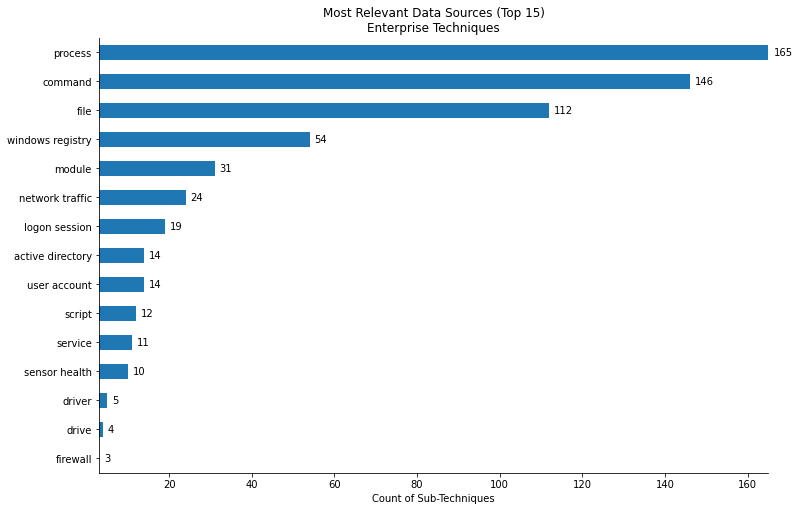

In [22]:
enterprise_sub = mapping[mapping['is_subtechnique'] == True][['technique_id','data_source','data_component']].drop_duplicates()
top15_data_source = enterprise_sub['data_source'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Sources (Top 15)\nEnterprise Techniques'
vis.barh_chart(top15_data_source,'data_source','index',title, xlabel = 'Count of Sub-Techniques')

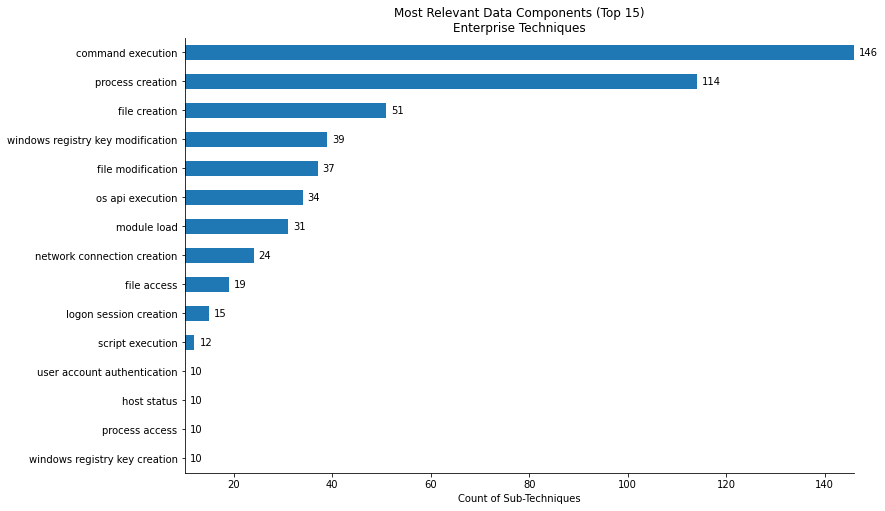

In [23]:
enterprise_sub = mapping[mapping['is_subtechnique'] == True][['technique_id','data_source','data_component']].drop_duplicates()
top15_data_source = enterprise_sub['data_component'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Components (Top 15)\nEnterprise Techniques'
vis.barh_chart(top15_data_source,'data_component','index',title, xlabel = 'Count of Sub-Techniques')

In [24]:
mapping[mapping['technique_id']=='T1003.001'][['data_source', 'data_component']].drop_duplicates()

,data_source,data_component
4213,process,process creation
4222,process,process access
4230,process,os api execution
4232,command,command execution


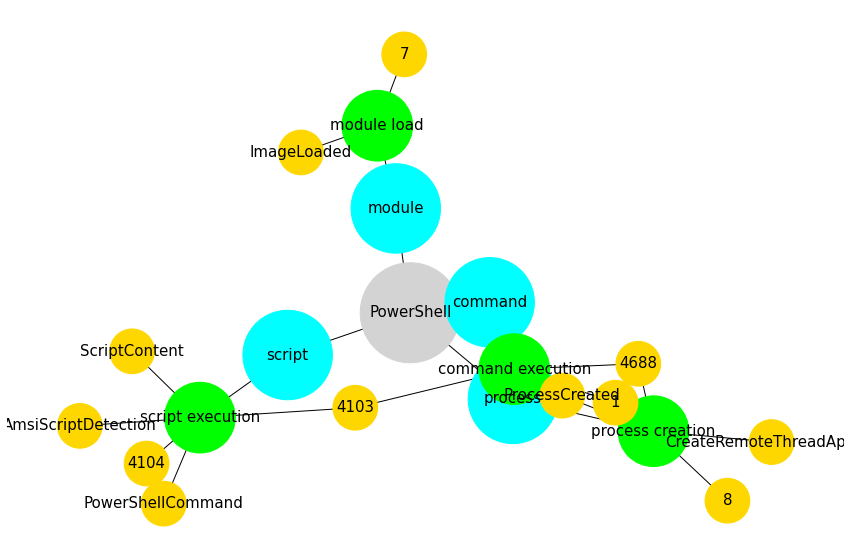

In [32]:
vis.attack_network_graph(mapping[(mapping['technique_id']=='T1059.001')])

In [29]:
mapping[mapping['technique_id']=='T1003.001'].columns

Index(['technique_id', 'is_subtechnique', 'technique', 'tactic', 'platform',
       'data_source', 'data_component', 'relationship_id', 'name', 'source',
       'relationship', 'target', 'event_id', 'event_name', 'event_platform',
       'audit_category', 'audit_sub_category', 'log_channel', 'log_provider',
       'filter_in', 'filter_in.ObjectType'],
      dtype='object')

In [34]:
mapping[mapping['technique_id']=='T1059.001'][['platform','data_source','data_component','name','source','target', 'event_id', 'event_name', 'event_platform',
       'audit_category', 'audit_sub_category', 'log_channel', 'log_provider',
       'filter_in', 'filter_in.ObjectType']]

,platform,data_source,data_component,name,source,target,event_id,event_name,event_platform,audit_category,audit_sub_category,log_channel,log_provider,filter_in,filter_in.ObjectType
2734,[Windows],process,process creation,User created Process,user,process,4688,A new process has been created.,Windows,Detailed Tracking,Process Creation,Security,Microsoft-Windows-Security-Auditing,NaN,NaN
2735,[Windows],process,process creation,User created Process,user,process,1,Process Creation.,Windows,ProcessCreate,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN
2736,[Windows],process,process creation,User created Process,user,process,1,Process Creation.,Windows,ProcessCreate,NaN,Linux-Sysmon/Operational,Linux-Sysmon,NaN,NaN
2737,[Windows],process,process creation,User created Process,user,process,ProcessCreated,ProcessCreated,Windows,None,NaN,DeviceProcessEvents,Microsoft Defender for Endpoint,NaN,NaN
2738,[Windows],process,process creation,Process created Thread,process,thread,8,CreateRemoteThread.,Windows,CreateRemoteThread,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN
2739,[Windows],process,process creation,Process created Thread,process,thread,CreateRemoteThreadApiCall,CreateRemoteThreadApiCall,Windows,None,NaN,DeviceEvents,Microsoft Defender for Endpoint,NaN,NaN
2740,[Windows],process,process creation,Process created Process,process,process,4688,A new process has been created.,Windows,Detailed Tracking,Process Creation,Security,Microsoft-Windows-Security-Auditing,NaN,NaN
2741,[Windows],process,process creation,Process created Process,process,process,1,Process Creation.,Windows,ProcessCreate,NaN,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,NaN,NaN
2742,[Windows],process,process creation,Process created Process,process,process,ProcessCreated,ProcessCreated,Windows,None,NaN,DeviceProcessEvents,Microsoft Defender for Endpoint,NaN,NaN
2743,[Windows],script,script execution,Process executed Script,process,Script,4103,Module logging.,Windows,Executing Pipeline,NaN,Microsoft-Windows-PowerShell/Operational,Microsoft-Windows-PowerShell,NaN,NaN
